# Fitting two models to Microlensing photometry

In this exercise, we will fit a Gaussian distribution and a Cauchy distribution to a light curve of a single-lens microlensing event. 

    

# initial imports

In [1]:
!pip install emcee
!pip install corner

     |████████████████████████████████| 45 kB 1.5 MB/s 


We will also need these packags: pandas, matplotlib, numpy, emcee, corner

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import emcee
import corner
from scipy.optimize import minimize
%matplotlib inline

# Read in the input dataset

In [3]:
# Path to OGLE data: https://raw.githubusercontent.com/Somayeh91/Data_Science_class_UD_fall_2021/main/data/OGLE_2012_BLG_1323.csv
# Path to Roman data: https://raw.githubusercontent.com/Somayeh91/Data_Science_class_UD_fall_2021/main/data/mag.dcnormffp_0_82_1902.det.lc.W149.csv 
OGLE = pd.read_csv("https://raw.githubusercontent.com/Somayeh91/Data_Science_class_UD_fall_2021/main/data/OGLE_2012_BLG_1323.csv",sep=',')
Roman = pd.read_csv("https://raw.githubusercontent.com/Somayeh91/Data_Science_class_UD_fall_2021/main/data/mag.dcnormffp_0_82_1902.det.lc.W149.csv",sep=',')

#Visualize the data

Text(0, 0.5, 'Magnification')

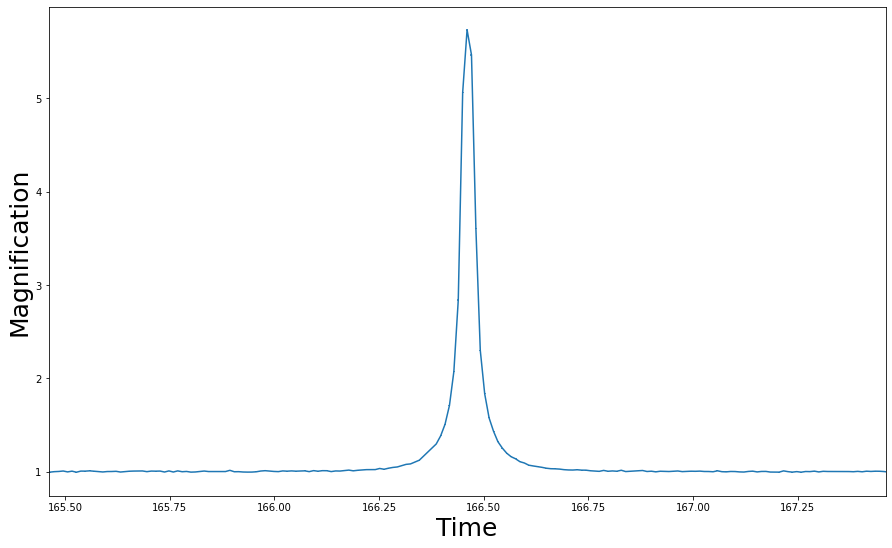

In [10]:
plt.figure(figsize=(15,9))
plt.errorbar(Roman.t, Roman.A, yerr=Roman.A_err)
dt = 1
peak = Roman.t[np.argmax(Roman.A)]
plt.xlim(peak-dt,peak+dt)
plt.xlabel('Time', size=25)
plt.ylabel('Magnification', size=25)

# Define the PSPL model and the Cauchy distributions


PSPL model:

$F(t) = f_s \times A(t) + (1-f_s)$

$A(t) = \frac{u(t)^2 +2}{u(t)\times \sqrt{u(t)^2 + 4}}$

$u(t) = \sqrt {{u_0}^2+ ({\frac {t-t_0}{t_E}})^2}$

Cauchy model:

$C(t) = 1+ \frac {amp}{{1+|\frac{t-t_0}{\sigma}|}^{2b}}$


In [15]:
def PSPL(x, x0, tE, u0, fs):
  u=np.sqrt((u0*u0)+((x-x0) / tE)**2)
  A = (u*u +2)/(u*np.sqrt(u*u+4))
  F = fs * A + (1-fs)
  return F

def cauchy (x, amp, x0,sigma, b):
  return 1 + (amp / (1 + abs((x-x0)/sigma)**(2*b)))

def L1(arg, x, y, func=PSPL):
  return np.sum(abs(y-func(x, *arg)))

def L2(arg, x, y, func=PSPL):
  return np.sum((y-func(x, *arg))**2)

def chi2(arg, x, y, s, func=PSPL):
  return np.sum(((y-func(x, *arg)) / (s))**2)

L2 unit test: result should be 111.93751462 -8.33237568: [111.93751456  -8.33237566]
chi2 unit test: result should be 104.93611121 -7.21374685: [104.93609323  -7.21374439]


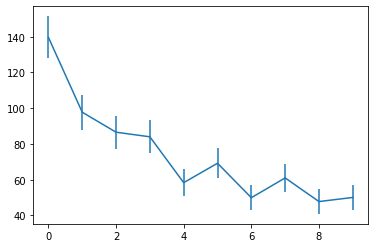

In [20]:
#Unit test
def line(a, b, x):
  return a*x + b
np.random.seed(222)
y = np.array([120, 95, 82, 74, 66, 62, 59, 51, 53, 47])
y = y + np.random.randn(len(y)) * 10
yerr = np.sqrt(y)
x = np.arange(len(y))
plt.errorbar(x, y, yerr=yerr);
print("L2 unit test: result should be 111.93751462 -8.33237568:", minimize(L2, (10,40), args=(x, y, line)).x)
print("chi2 unit test: result should be 104.93611121 -7.21374685:", minimize(chi2, (10,40), args=(x, y, yerr, line)).x)


# Fit the two functions to the data by minimizing an objective function 


Use the l1 function as your objective function.

In [23]:
# Fitting the PSPL function to data by minimizing L1

x = Roman.t.values
y = Roman.A.values

# initial guesses for PSPL function: x0, tE, u0, fs
initialguess = [peak, 0.1, 0.02, 0.46]

minimize(L1, initialguess, args = (x,y,PSPL))

      fun: 125.37309014239274
 hess_inv: array([[ 3.59603349e-07, -1.13375679e-07,  2.58950589e-06,
         2.46579748e-05],
       [-1.13375679e-07,  5.52571104e-06, -3.89201142e-05,
        -3.33451986e-04],
       [ 2.58950589e-06, -3.89201142e-05,  3.07195403e-04,
         2.59401970e-03],
       [ 2.46579748e-05, -3.33451986e-04,  2.59401970e-03,
         2.21530433e-02]])
      jac: array([-1.83201981, 41.15000057,  2.69372749,  0.65974045])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 810
      nit: 23
     njev: 133
   status: 2
  success: False
        x: array([1.66463763e+02, 4.94063712e-02, 2.92359193e-01, 1.94455870e+00])

In [ ]:
# Fitting the Cauchy function to data by minimizing L1

.
.
.
.

In [ ]:
# Visualizing the results

plt.figure(figsize=(15,9))

.
.
.
.

# Fit the two functions to the data by minimizing an objective function 


Use the l2 function as your objective function.

In [ ]:
# Fitting the PSPL function to data by minimizing L2

.
.
.
.

In [ ]:
# Fitting the Cauchy function to data by minimizing L2

.
.
.
.

In [ ]:
# Visualizing the results

plt.figure(figsize=(15,9))

.
.
.
.


# Fit the two functions to the data by minimizing an objective function 


Use the ${\chi}^2$ function as your objective function.

In [ ]:
# Fitting the PSPL function to data by minimizing the chi-squared function


.
.
.
.

In [ ]:
# Fitting the Cauchy function to data by minimizing the chi-squared function


.
.
.
.

In [ ]:
# Visualizing the results

plt.figure(figsize=(15,9))

.
.
.
.


# Now let's fit a PSPL and a Cauchy with MCMC!



For fitting a PSPL model:

In [ ]:
# define log likelihood function
def log_likelihood....

.
.
.
.


In [ ]:
# define log prior function

def log_prior...


.
.
.
.


In [ ]:
# define log probability function

def log_probability...

.
.
.
.


In [ ]:
#initial guess
ig = [peak, .1, 0.02, 0.464796]

In [ ]:
#initialize walkers
nwalkers = 32
ndim = len(ig)

In [ ]:
pos = np.array(ig) + 1e-4 * np.random.randn(nwalkers, ndim)

In [ ]:
pos.shape

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, s))

In [ ]:
sampler.run_mcmc(pos, 5000, progress=True);

In [ ]:
samples = sampler.get_chain()

In [ ]:
samples.shape

In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

In [ ]:
mcmc = np.zeros((ndim, 3))
for i in range(ndim):
  mcmc[i] = np.percentile( flat_samples[:,i], [16, 50, 84])
params_PSPL = mcmc[:,1]

In [ ]:
plt.rcParams["font.size"]= 13
fig = corner.corner(
    flat_samples, labels=["t0", "tE", "u0", "fs"], truths=mcmc[:,1]);


In [ ]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
# zoom in: the beginning of the chain should be cut
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, 100)#len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

For fitting a Cauchy distribution:

In [ ]:
def log_prior....


In [ ]:
def log_likelihood....

In [ ]:
def log_probability....

In [ ]:
#initial guess
ig = [max(y), peak, 1, .1]

In [ ]:
#initialize walkers
nwalkers = 32
ndim = len(ig)

In [ ]:
pos = np.array(ig) + 1e-4 * np.random.randn(nwalkers, ndim)

In [ ]:
pos.shape

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, s))

In [ ]:
sampler.run_mcmc(pos, 5000, progress=True);

In [ ]:
samples = sampler.get_chain()

In [ ]:
samples.shape

In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

In [ ]:
mcmc = np.zeros((ndim, 3))
for i in range(ndim):
  mcmc[i] = np.percentile( flat_samples[:,i], [16, 50, 84])
params_cauchy = mcmc[:,1]

In [ ]:

plt.rcParams["font.size"]= 13
fig = corner.corner(
    flat_samples, labels=["Amplitude","x0","flattness","sigma"], truths=mcmc[:,1]);


In [ ]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
# zoom in: the beginning of the chain should be cut
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, 100)#len(samples))
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
plt.figure(figsize=(15,9))
dt = .1
x_new = np.linspace(min(x), max(x), len(x)*100)
plt.errorbar(df.t,df.A, yerr=df.A_err, fmt = '-o', ms=16,color='grey', zorder = -10, label = 'data')
plt.plot(x_new, PSPL(x_new, *params_PSPL),linewidth=3,color='red', label = 'PSPL fit')
plt.plot(x_new, cauchy(x_new, *params_cauchy),linewidth=3,color = 'orange', label = 'Cauchy fit')
peak = df.t[np.argmax(df.A)]
plt.xlim(peak-dt,peak+dt)
plt.xlabel('Time-peak (days)')
plt.ylabel('Magnification')
plt.legend()